                name         nation position         team   age    born  \
0         Max Aarons        England       DF  Bournemouth  25.0  2000.0   
1  Joshua Acheampong        England       DF      Chelsea  19.0  2006.0   
2        Tyler Adams  United States       MF  Bournemouth  26.0  1999.0   
3   Tosin Adarabioyo        England       DF      Chelsea  27.0  1997.0   
4      Simon Adingra   Cote dIvoire    FW,MF     Brighton  23.0  2002.0   

   played  starts  minutes  goals  assists  penalty_kicks  \
0       3       1       86      0        0              0   
1       4       2      170      0        0              0   
2      27      20     1875      0        3              0   
3      21      14     1319      1        1              0   
4      28      11     1052      2        2              0   

   penalty_kick_attempts  yellow  red  expected_goals  progressive_carries  \
0                      0       0    0             0.0                    1   
1                      0  

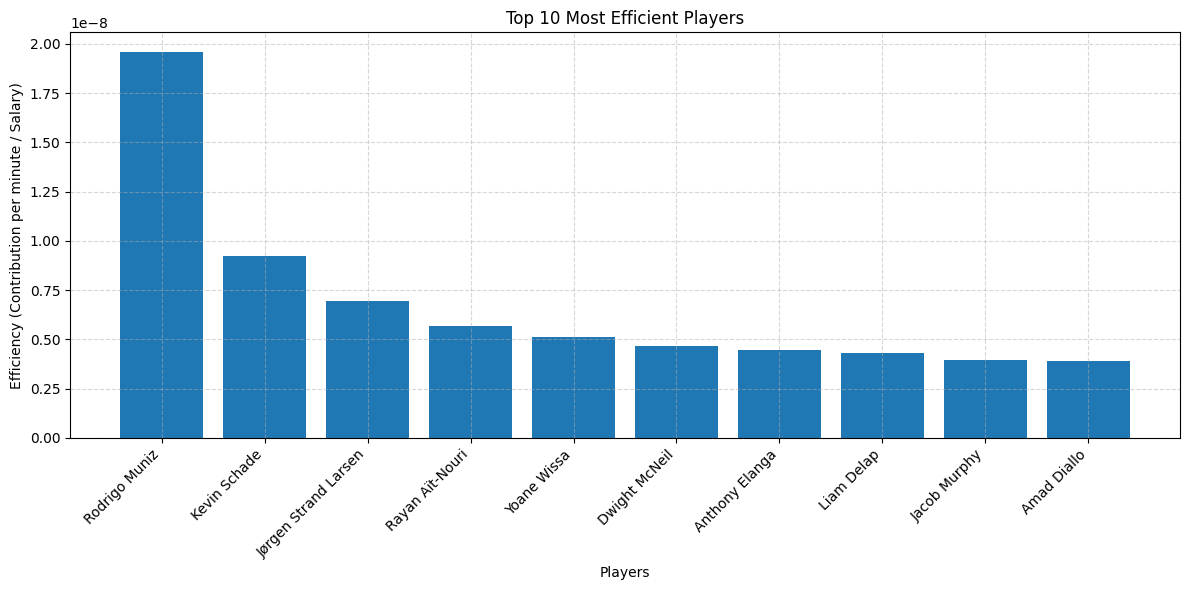

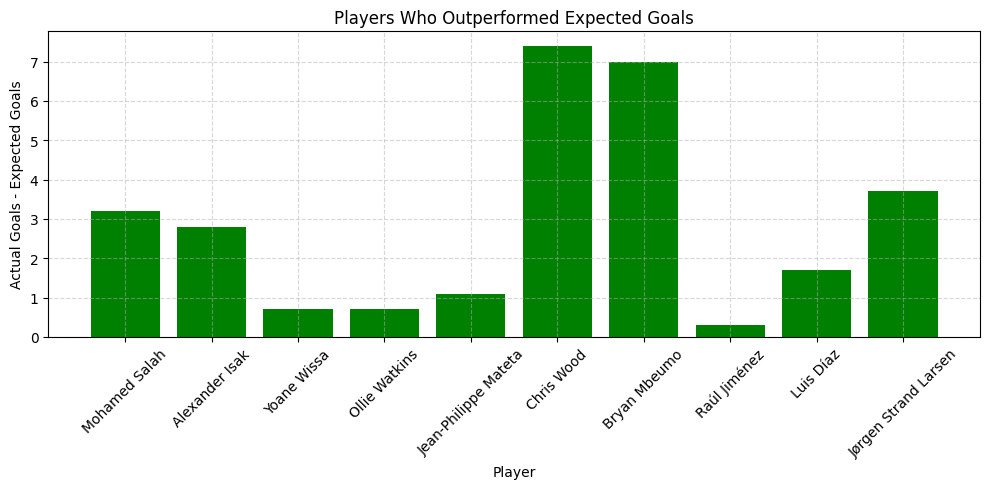

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

player_stats = pd.read_csv('/kaggle/input/2025-premier-league-stats-matches-salaries/player_stats.csv')
player_salaries = pd.read_csv('/kaggle/input/2025-premier-league-stats-matches-salaries/player_salaries.csv')

print(player_stats.head())
print(player_salaries.head())

player_salaries.rename(columns={"Player": "name"}, inplace=True)
data = pd.merge(player_stats, player_salaries, on="name")

data["contribution"] = data["goals"] + data["assists"]
data["contribution_per_minute"] = data["contribution"] / data["minutes"]
data["efficiency"] = data["contribution_per_minute"] / data["Annual"]

filtered_data = data[(data["minutes"] >= 800) & (data["contribution"] >= 7)]
top10 = filtered_data.sort_values(by="efficiency", ascending=False).head(10)

finishing = data[data["expected_goals"] < data["goals"]]
top_finishers = finishing.sort_values(by="expected_goals", ascending=False).head(10)

print(top_finishers[["name", "team", "goals", "expected_goals"]])
print(top10[["name", "team", "goals", "assists", "minutes", "Annual", "contribution_per_minute", "efficiency"]])

names = top10["name"]
efficiencies = top10["efficiency"]

plt.figure(figsize=(12, 6))
plt.bar(names, efficiencies)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Players")
plt.ylabel("Efficiency (Contribution per minute / Salary)")
plt.title("Top 10 Most Efficient Players")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

x = top_finishers["name"]
y = top_finishers["goals"] - top_finishers["expected_goals"]

plt.figure(figsize=(10, 5))
plt.bar(x, y, color='green')
plt.title("Players Who Outperformed Expected Goals")
plt.xlabel("Player")
plt.ylabel("Actual Goals - Expected Goals")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


                 player           team_x position_x  carries  touches  \
21     Joachim Andersen   Crystal Palace         DF       49       93   
139       Patrick Dorgu   Manchester Utd         DF      289      516   
265       Tariq Lamptey         Brighton         DF      292      535   
477  Kyle Walker-Peters      Southampton         DF     1271     2022   
63        Conor Bradley        Liverpool         DF      333      608   
479   Aaron Wan-Bissaka         West Ham         DF     1025     2164   
393    Antonee Robinson           Fulham         DF     1313     2464   
248      Michael Kayode        Brentford         DF      111      255   
494       Neco Williams  Nott'ham Forest         DF      633     1514   
251        Milos Kerkez      Bournemouth         DF     1049     2087   

     deffensive_touches  carry_outside_ratio  
21                   38             0.290909  
139                 141             0.090667  
265                 161             0.085561  
477     

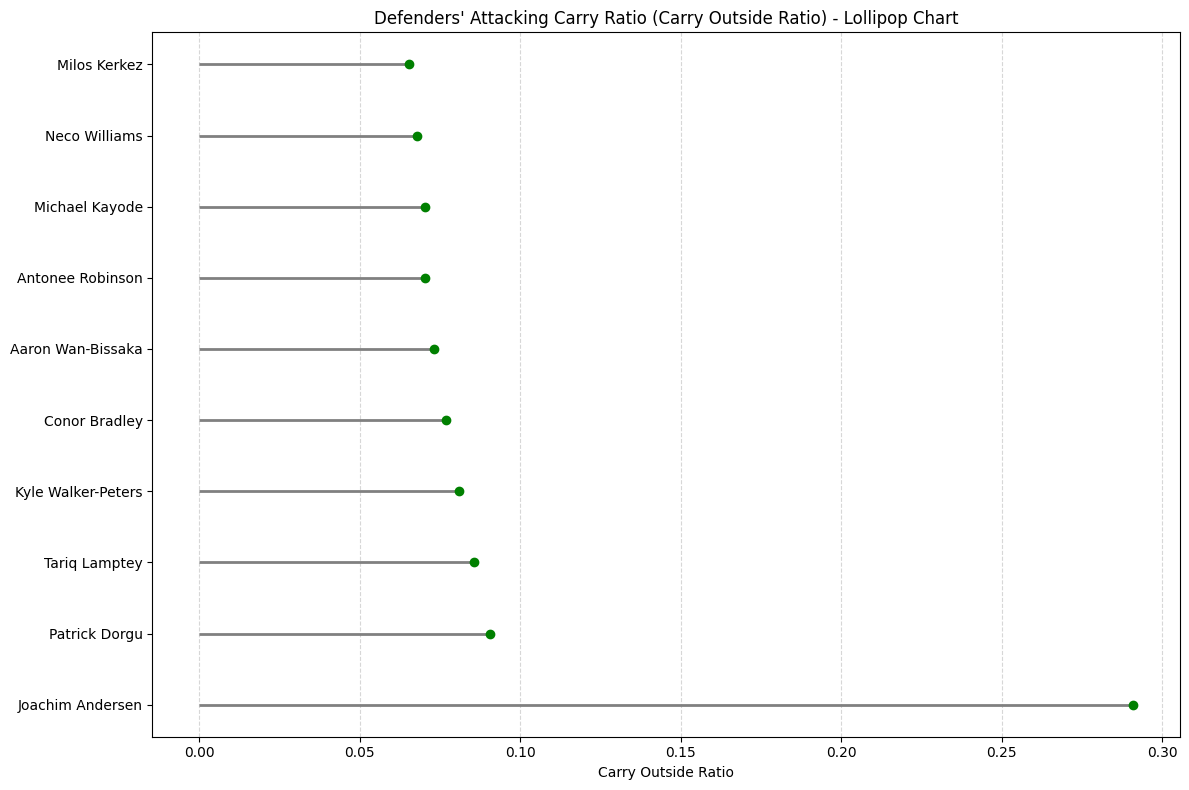

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

player_possession_stats = pd.read_csv('/kaggle/input/2025-premier-league-stats-matches-salaries/player_possession_stats.csv')
player_stats = pd.read_csv('/kaggle/input/2025-premier-league-stats-matches-salaries/player_stats.csv')

data = pd.merge(player_possession_stats, player_stats, left_on="player", right_on="name")

defenders = data[
    (data["position_x"].str.contains("DF", case=False, regex=True)) &
    (~data["position_x"].str.contains("MF", case=False, regex=True)) &
    (~data["position_x"].str.contains("FW", case=False, regex=True))
]

filtered = defenders[defenders["progressive_carries"] >= 5].copy()

filtered["carry_outside_ratio"] = filtered["progressive_carries"] / (
    filtered["touches"] - filtered["deffensive_touches"]
)

top_carry_outside = filtered.sort_values(by="carry_outside_ratio", ascending=False).head(10)

print(top_carry_outside[[
    "player", "team_x", "position_x", "carries", "touches", "deffensive_touches", "carry_outside_ratio"
]])

players = top_carry_outside["player"]
ratios = top_carry_outside["carry_outside_ratio"]

plt.figure(figsize=(12, 8))
plt.hlines(y=players, xmin=0, xmax=ratios, color='gray', linewidth=2)
plt.plot(ratios, players, "o", color="green")
plt.xlabel("Carry Outside Ratio")
plt.title("Defenders' Attacking Carry Ratio (Carry Outside Ratio) - Lollipop Chart")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


                 player             team position  successful_take_ons  \
480         RamÃ³n Sosa  Nott'ham Forest    FW,MF                    8   
241  Callum Hudson-Odoi  Nott'ham Forest    FW,MF                   37   
184        Carlos Forbs           Wolves    MF,FW                    7   
384       Ethan Nwaneri          Arsenal    FW,MF                   32   
280  Bilal El Khannouss   Leicester City    MF,FW                   34   
423        Jacob Ramsey      Aston Villa    FW,MF                   25   
141         Jeremy Doku  Manchester City    FW,MF                  107   
216      Luis Guilherme         West Ham    MF,FW                    7   
342       Dwight McNeil          Everton    MF,FW                   24   
13       Carlos Alcaraz          Everton    FW,MF                    9   
56                 Beto          Everton       FW                   19   
117    Mikkel Damsgaard        Brentford    MF,FW                   50   
190          Cody Gakpo        Liverpo

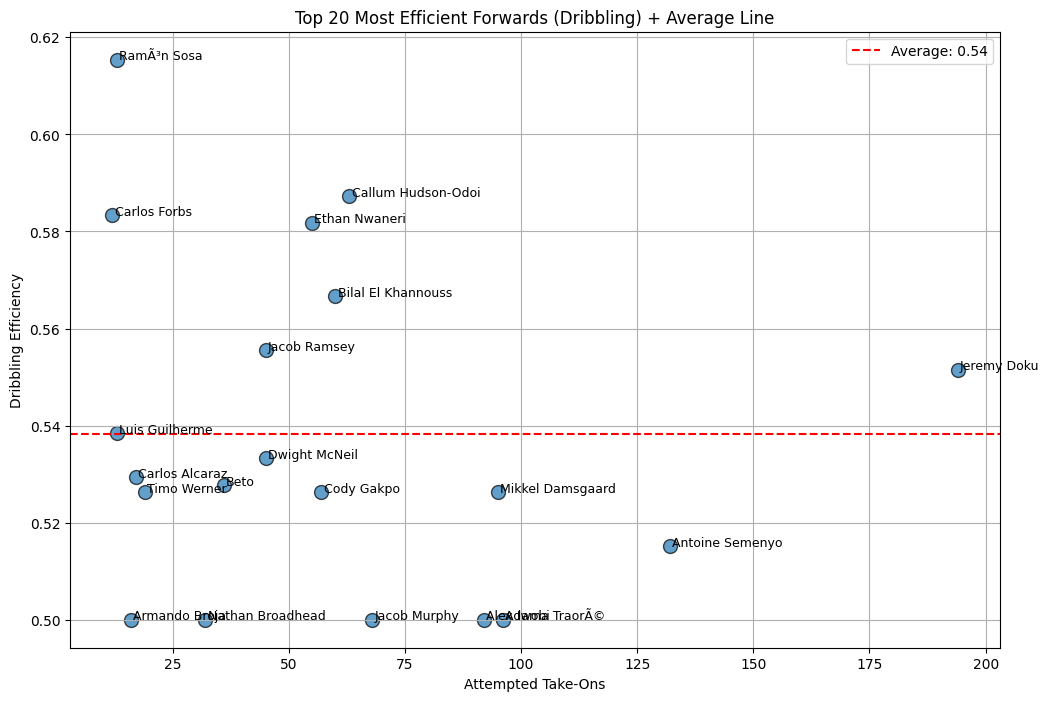

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

player_possession_stats = pd.read_csv('/kaggle/input/2025-premier-league-stats-matches-salaries/player_possession_stats.csv')

dribble_data = player_possession_stats[player_possession_stats["attempted_take_ons"] >= 10].copy()
dribble_data["dribbling_efficiency"] = dribble_data["successful_take_ons"] / dribble_data["attempted_take_ons"]
attackers = dribble_data[dribble_data["position"].str.contains("FW", case=False, regex=True)].copy()
top_dribblers = attackers.sort_values(by="dribbling_efficiency", ascending=False).head(20)

print(top_dribblers[["player", "team", "position", "successful_take_ons", "attempted_take_ons", "dribbling_efficiency"]])

average_efficiency = top_dribblers["dribbling_efficiency"].mean()

plt.figure(figsize=(12, 8))
plt.scatter(
    top_dribblers["attempted_take_ons"],
    top_dribblers["dribbling_efficiency"],
    s=100,
    alpha=0.7,
    edgecolors="k",
)
plt.axhline(y=average_efficiency, color='red', linestyle='--', label=f'Average: {average_efficiency:.2f}')

for i, row in top_dribblers.iterrows():
    plt.text(
        row["attempted_take_ons"] + 0.5,
        row["dribbling_efficiency"],
        row["player"],
        fontsize=9
    )

plt.xlabel("Attempted Take-Ons")
plt.ylabel("Dribbling Efficiency")
plt.title("Top 20 Most Efficient Forwards (Dribbling) + Average Line")
plt.legend()
plt.grid(True)
plt.show()
